In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [1]:
import os
os.getcwd()
os.chdir('c:\\Users\\Stior\\Documents\\cours\\L3SID\\Projet-InterPromo\
\\ProjetInterpromo2020G8')

In [2]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import PIL
import json

In [3]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    

class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [6]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [0]:
pipeline.print_process()

### Ouverture d'image

In [10]:
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 1)

# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Aer_Lingus_Airbus_A320_plane9.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Aer_Lingus_Airbus_A320_plane9.jpg', 1)


# # img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Air_Transat_Airbus_A330-300_V2_plane128.jpg', 0)
# # img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Air_Transat_Airbus_A330-300_V2_plane128.jpg', 1)

# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
# template = cv2.imread('./images/templateTest.jpg', 0)
# template = cv2.imread('./images/templateNormalSeat-SansBlanc.png', 0)
# template = cv2.imread('./images/templateNormalSeat-SansBlanc.jpg', 0)
template = cv2.imread('./images/templateTest-sansBlanc.png', 0)

# cv2.imshow('Test', img2)
# cv2.waitKey()
# cv2.destroyAllWindows()
h, w = template.shape
# Match template method
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',\
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

### Premier test de pattern matching + sortie en txt

In [16]:

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
THRESHOLD = 0.8
loc = np.where( res >= THRESHOLD)

coord = []

for pt in zip(*loc[::-1]):
    coord.append((pt[0], pt[1]))
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

for i in coord:
    cv2.circle(img_rgb, i, 1, (255, 0, 0), -1)

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows() 

print(coord)


with open("coord.txt", "a") as fichier:
    for xy in coord:
        fichier.write(str(xy[0]) + ", " + str(xy[1]) + "\n")



[(146, 517), (133, 537), (146, 537), (185, 537), (198, 537), (211, 537), (224, 537), (263, 537), (276, 537), (133, 557), (146, 557), (185, 557), (198, 557), (211, 557), (224, 557), (263, 557), (276, 557), (133, 577), (146, 577), (185, 577), (198, 577), (211, 577), (224, 577), (263, 577), (276, 577), (133, 597), (146, 597), (185, 597), (198, 597), (211, 597), (224, 597), (263, 597), (276, 597), (133, 617), (146, 617), (185, 617), (198, 617), (211, 617), (224, 617), (263, 617), (276, 617), (133, 637), (146, 637), (185, 637), (198, 637), (211, 637), (224, 637), (263, 637), (276, 637), (133, 657), (146, 657), (185, 657), (198, 657), (211, 657), (224, 657), (263, 657), (276, 657), (133, 677), (146, 677), (185, 677), (198, 677), (211, 677), (224, 677), (263, 677), (276, 677), (133, 697), (146, 697), (185, 697), (198, 697), (211, 697), (224, 697), (263, 697), (276, 697), (133, 717), (146, 717), (185, 717), (198, 717), (211, 717), (224, 717), (263, 717), (276, 717), (133, 737), (146, 737), (18

### Second test avec list de pattern

In [17]:
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 1)
# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
templates = ['./images/temp_business_seat_armrest_left.jpg', './images/temp_business_seat_armrest_right.jpg', './images/temp_business_elec1.jpg']
# templates = ['./images/templateBusinessElectricity.jpg']

for templ in templates:
    template = cv2.imread(templ, 0)
    h, w = template.shape
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    if templ == './images/temp_business_elec1.jpg':
        THRESHOLD = 0.7
    else:
        THRESHOLD = 0.7

    loc = np.where(res >= THRESHOLD)

    coord = []

    fichier = open("coord.txt", "a")

    if templ == './images/temp_business_elec1.jpg':
        fichier.write('-------------------\nPrise electrique \n')

    for pt in zip(*loc[::-1]):
        fichier.write(str(pt[0]) + ", " + str(pt[1]) + "\n")
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    fichier.close()

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
# cv2.imwrite('test.jpeg', img_rgb)

print(np.where(res >= THRESHOLD))

(array([334, 334, 334, 334, 334, 367, 367, 368, 399, 401, 431, 431, 435,
       435, 435], dtype=int64), array([140, 190, 217, 268, 269, 191, 218, 250, 190, 140, 191, 218, 149,
       250, 277], dtype=int64))


In [18]:
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-900_plane259.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-900_plane259.jpg', 1) # Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 1) # Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 1) # Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/American_Airlines_777-300_ER_plane167.svg.png', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/American_Airlines_777-300_ER_plane167.svg.png', 1) # Null
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Asiana_Boeing_777-200_ER_D_plane206.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Asiana_Boeing_777-200_ER_D_plane206.jpg', 1) # Null - rectangle autour
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Avianca_Boeing_787-8_plane313.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Avianca_Boeing_787-8_plane313.jpg', 1) #Ok
img_gray = cv2.imread('./theo_remove_caracters_yellow.jpg', 0)
img_rgb = cv2.imread('./theo_remove_caracters_yellow.jpg', 1) #Ok


# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
templates = ['./images/temp_business_turn_left.jpg', 'templateTest.jpg', './images/templateNormalSeat-SansBlanc.jpg', './images/temp_normal_seat_elec.jpg']




#### Rotation d'un template + changement du noir en blanc

In [19]:
# Rotation 45° left + black => white

templateTest = PIL.Image.open('./images/temp_business_seat_footrest.jpg')
rotate = templateTest.rotate(45)
rotate = rotate.convert('RGBA')

data = np.array(rotate)   # "data" is a height x width x 4 numpy array
red, green, blue, alpha = data.T # Temporarily unpack the bands for readability


black_areas = (red == 0) & (blue == 0) & (green == 0)
data[..., :-1][black_areas.T] = (255, 255, 255) # Black back to white
rotate = PIL.Image.fromarray(data)
rotate.show()
rotate = rotate.convert('RGB')
rotate.save('templateTest.jpg')

#### Transformation d'un template en son symétrique par rapport a la droite

In [20]:
# Right symmetry
templateTest = PIL.Image.open('./images/temp_business_turn_left.jpg')
rotate = templateTest.transpose(PIL.Image.FLIP_LEFT_RIGHT)

rotate.show()
rotate.save('templateTest.jpg')


#107-171-93

#### Changement du fond blanc => couleur voulu

In [21]:
templateTest = PIL.Image.open(templates[2])
templateTest = templateTest.convert('RGBA')

data = np.array(templateTest)
red, green, blue, alpha = data.T

THRESHOLD = 250 # To chose white background

white_areas = (red >= THRESHOLD) & (blue >= THRESHOLD) & (green >= THRESHOLD)
data[..., :-1][white_areas.T] = (255, 0, 0) # Set background color
templateTest = PIL.Image.fromarray(data)
templateTest.show()

#### Test avec les pattern précédement modifié + sortie des coordonnées pour chaque siege

In [22]:
for templ in templates:
    template = cv2.imread(templ, 0)
    h, w = template.shape
    
    res = cv2.matchTemplate(img_gray, template,cv2.TM_CCOEFF_NORMED)
    
    THRESHOLD = 0.9
    if templ == 'templateTest.jpg':
        THRESHOLD = 0.60
    if templ == templates[0]:
        THRESHOLD = 0.60
    if templ == templates[3]:
        THRESHOLD = 0.7


    loc = np.where( res >= THRESHOLD)

    # fichier = open("coord.txt", "a")
    for pt in zip(*loc[::-1]):
        # fichier.write(str(pt[0]) + ", " + str(pt[1]) + "\n")
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# fichier.close()

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('test.jpg', img_rgb)

#print(np.where( res >= THRESHOLD))

AttributeError: 'NoneType' object has no attribute 'shape'

### Mise au propre + commmentaire + test sur plusieur image similaire

In [0]:
# Input Image plane
# Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-900_plane259.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-900_plane259.jpg', 1)
# OK
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 1)
# Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 1)
# NOk
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'American_Airlines_777-300_ER_plane167.svg.png', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'American_Airlines_777-300_ER_plane167.svg.png', 1)
# NOk
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Asiana_Boeing_777-200_ER_D_plane206.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Asiana_Boeing_777-200_ER_D_plane206.jpg', 1)
# OK
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Avianca_Boeing_787-8_plane313.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/' \
# 'LAYOUT SEATGURU/Avianca_Boeing_787-8_plane313.jpg', 1)
# Ok
img_gray = cv2.imread('./theo_remove_caracters_yellow.jpg', 0)
img_rgb = cv2.imread('./theo_remove_caracters_yellow.jpg', 1)

# Input template
templates = [
            './images/temp_business_turn_left.jpg',
            './images/temp_business_turn_right.jpg',
            './images/temp_normal_seat_elec.jpg'
            ]

for templ in templates:
    # Open template
    template = cv2.imread(templ, 0)
    h, w = template.shape

    # List of match
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

    # Set accuracy for each template
    threshold = 0.9
    if templ == templates[0]:
        print('temp_business_turn_left')
        threshold = 0.60
    if templ == templates[1]:
        print('temp_business_turn_right')
        threshold = 0.60
    if templ == templates[2]:
        print('temp_normal_seat_elec')
        threshold = 0.63

    loc = np.where(res >= threshold)  # Filtering with the previous THRESHOLD

    for pt in zip(*loc[::-1]):
        # Output seat position
        print(str(pt[0]) + ', ' + str(pt[1]))
        # Tracing rectangle
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display results
# cv2.imshow('test', img_rgb)
# cv2.waitKey()
# cv2.destroyAllWindows()

# Save results
# cv2.imwrite('test.jpg', img_rgb)

### Creation d'une fonction du code précédent : 
#### Entrée : chemin d'image, liste de chemin de templates, liste de seuils
#### Sortie : Liste de liste de coordonnée pour chaque template

In [7]:
def coord_seats_finder(path_image, templates = ['./images/temp_business_turn_left.jpg', './images/temp_business_turn_right.jpg', './images/temp_normal_seat_elec.jpg'], thresholds = [0.60, 0.60, 0.63], show = False):
    """
    input:
        path_image : image plane
        templates : list of templates for pattern matching
        thresholds : list of threshold for each template, set accuracy
    output:
        position : list of list right angle position for each pattern match
    """
    # Open image
    img_rgb = cv2.imread(path_image, 1)
    img_gray = cv2.imread(path_image, 0)
    position = []
    for i in range(len(templates)):  # Iteration on each pattern
        template = cv2.imread(templates[i], 0)  # Read pattern image
        h, w = template.shape
        # List of match
        res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
        position.append([])
        for pos in zip(*np.where(res >= thresholds[i])[::-1]):
            position[i].append(pos)  # add position to output
            cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)
    if show:
        cv2.imshow('test', img_rgb)
        cv2.waitKey()
        cv2.destroyAllWindows()
    return(position)

print(coord_seats_finder('./theo_remove_caracters_yellow.jpg', show = False))


AttributeError: 'NoneType' object has no attribute 'shape'

### Simplification de la fonction coord_seats_finder() :
#### Entrée : une image, un template, un seuil
#### Sortie : list de coordonnée

In [3]:
def coord_pattern_finder(image, template, threshold: float):
    """
    input:
        image : image plane cv2.imread() black and white
        template : image pattern cv2.imread() black and white
        threshold : threshold for this pattern
    output:
        position : list right angle position for this pattern on the image

    """
    position = []  # Variable output
    # List of match
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    for pos in zip(*np.where(res >= threshold)[::-1]):
        position.append(pos)
    return(position)

### Test de la fonction coord_pattern_finder()

In [0]:
path_image = './theo_remove_caracters_yellow.jpg'
templates = ['./images/temp_business_turn_left.jpg', './images/temp_business_turn_right.jpg', './images/temp_normal_seat_elec.jpg']
thresholds = [0.60, 0.60, 0.63]
img = cv2.imread(path_image, 0)
template = cv2.imread(templates[0], 0)
h, w = template.shape
img_rgb = cv2.imread(path_image, 1)

position = coord_pattern_finder(img, template, 0.6)

for pos in position:
    cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

### Test sur plusieur plan ou famille de plan avec choix d'un ou plusieur pattern

In [17]:
pathTempl = "./Images/" # Path for template
imagesTemp = os.listdir(pathTempl)
templates = []
tempName = 'temp_' # Template or family name

pathPlane = "../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/" # Path for plane images
imagesPlane = os.listdir(pathPlane)
plane = []

planeName = 'Aer_Lingus_' # Plane or family name


for i in imagesTemp:
    if 'temp_' in i and 'seat' in i:
        templates.append(i)

for i in imagesPlane:
    if planeName in i:
        plane.append(i)

# print(templates)

for p in plane[:3]:
    img_rgb = cv2.imread(pathPlane + p, 1)
    img_gray = cv2.imread(pathPlane + p, 0)
    # print(p + ' shape', img_gray.shape)

    fichier = open("coord_" + p + ".txt", "a")
    
    for templ in templates[5:6]:
        template = cv2.imread(pathTempl + templ, 0)
        h, w = template.shape
        print(templ + ':' + str(w) + ' ' + str(h))

        threshold = 0.8 #  Default threshold
        # Choose threshold for each template
        if templ == 'temp_business_seat_armrest_left.jpg':
            threshold = 0.6
        elif templ == 'temp_business_seat_armrest_right.jpg':
            threshold = 0.6
        elif templ == 'temp_business_seat_footrest.jpg':
            threshold = 1
        elif templ == 'temp_first_seat.jpg':
            threshold = 1
        elif templ == 'temp_normal_seat.png':
            threshold = 0.7
        elif templ == 'temp_normal_seat_elec.jpg':
            threshold = 1
        elif templ == 'temp_normal_seat_little.jpg':
            threshold = 0.65
        elif templ == 'temp_yellow_seat.jpg':
            threshold = 1
        threshold = 0.75


        position = coord_pattern_finder(img_gray, template, threshold)
        
        fichier.write(templ + ':' + str(w) + ' ' + str(h) + '\n')
        for pos in position:
            fichier.write(str(pos[0]) + ', ' + str(pos[1]) + '\n')
            cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)

    fichier.close()
    cv2.imshow(p, img_rgb)
    cv2.waitKey()
    cv2.destroyAllWindows()

temp_first_seat.jpg:17 44
temp_first_seat.jpg:17 44
temp_first_seat.jpg:17 44


### Recupération nombre de seat par type d'avion et par catégorie

In [133]:
pathPlane = "../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/" # Path for plane images
imagesPlane = os.listdir(pathPlane)
plane = []
planeName = 'Aer_Lingus_' # Plane or family name

for i in imagesPlane:
    if planeName in i:
        plane.append(i)
# print(plane)

SEATGURU_INFO_AIRCRAFT = pd.read_csv('../All data/SEATGURU_INFO_AIRCRAFT.csv', sep=';')
image_lignes = pd.read_csv('Image_lignes.csv', sep=';')

nbSeatTotal = {}

for rowNumber, data in image_lignes.iterrows():
    if data['image'] in imagesPlane[:1194] or data['image'] in imagesPlane[1195:]:
        lignes = eval(data['lignes'])
        for i in lignes:
            if not (data['image'] in nbSeatTotal.keys()):
                nbSeatTotal[data['image']] = {}
                nbSeatTotal[data['image']]['Total_seat'] = SEATGURU_INFO_AIRCRAFT.loc[i]['Total_seat']
            if not (SEATGURU_INFO_AIRCRAFT.loc[i]['Category'] in nbSeatTotal[data['image']].keys()):
                nbSeatTotal[data['image']][SEATGURU_INFO_AIRCRAFT.loc[i]['Category']] = {}
            if not (SEATGURU_INFO_AIRCRAFT.loc[i]['Seat_Type'] in nbSeatTotal[data['image']][SEATGURU_INFO_AIRCRAFT.loc[i]['Category']].keys()):
                nbSeatTotal[data['image']][SEATGURU_INFO_AIRCRAFT.loc[i]['Category']][SEATGURU_INFO_AIRCRAFT.loc[i]['Seat_Type']] = SEATGURU_INFO_AIRCRAFT.loc[i]['Count']

# json[key] = dict
# print(nbSeatTotal)


In [89]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

with open('avion.json', 'w') as f:
    json.dump(nbSeatTotal, f, cls=NpEncoder)
# json.dumps(nbSeatTotal)

### Creation category template

In [38]:
def templ_category(path = './images/TEMPLATE/', category = 'BUSINESS', seatType='STANDARD', planeName='test.jpg'):
    """
    Create list of template open with cv2 by category and seatType
    Input:
        Path: directory path of templates
        category: name of category
        seatType: Seat type
        planeName: plane name
    Output:
        templates: list of template name
    """
    if '.png' in planeName:
        extension = 'PNG/'
    else:
        extension = 'JPG/'

    imagesTemp = os.listdir(path + category + '/' + extension)
    templates = []

    for i in imagesTemp:
        if seatType in i:
            templates.append(cv2.imread(path + category + '/' + extension + i, 0)) 
            # cv2.imshow('TEST', cv2.imread(path + category + '/' + extension + i, 0))
            # cv2.waitKey()
            # cv2.destroyAllWindows()   
    return(templates)

# cv2.imshow('TEST', templ_category(category = 'ECONOMY')[0])
# cv2.waitKey()
# cv2.destroyAllWindows()
print(templ_category(category = 'ECONOMY', seatType='STANDARD')[0])

[[234 214 161 155 155 156 155 157 155 155 156 156 156 157 155 155 157 155
  159 200 241]
 [207 129 180 192 204 208 210 209 211 210 211 211 211 212 212 213 212 194
  198 142 172]
 [148 189 236 210 228 236 236 237 238 238 239 239 239 240 240 241 242 213
  234 229 127]
 [128 226 235 213 228 236 237 237 236 238 239 239 240 241 241 241 242 214
  234 242 158]
 [129 234 235 211 228 236 238 237 237 238 239 239 240 240 241 241 242 214
  234 242 159]
 [128 234 235 212 228 236 236 238 237 238 238 239 240 240 240 241 242 215
  232 242 157]
 [128 234 234 213 228 236 238 237 237 238 239 239 240 240 240 241 242 214
  234 244 156]
 [128 233 236 211 229 236 236 237 237 238 239 239 239 240 240 242 241 214
  232 242 157]
 [128 234 235 212 229 236 237 237 237 238 239 239 239 240 241 242 241 214
  233 243 157]
 [128 234 235 212 228 236 237 237 237 238 240 239 239 240 241 241 241 214
  234 242 156]
 [128 235 234 213 228 237 237 237 237 238 239 240 239 241 240 241 241 214
  232 243 157]
 [128 234 234 212 228

### calcul taux réussite

In [19]:
pathPlane = "../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/" # Path for plane images

cat = 'ECONOMY'
templates = templ_category(category = 'normal')
print(templates)

if cat == 'ECONOMY':
    threshold = 0.8
elif cat == 'BUSINESS':
    threshold = 0.65

for p in plane:
    img_rgb = cv2.imread(pathPlane + p, 1)
    img_gray = cv2.imread(pathPlane + p, 0)

    # fichier = open("coord_" + p + ".txt", "a")
    taux = []
    for templ in templates:
        template = cv2.imread(pathTempl + templ, 0)

        position = coord_pattern_finder(img_gray, template, threshold)
        if cat in nbSeatTotal[p].keys():
            taux.append(len(position)/nbSeatTotal[p][cat])  # level of succes for each template
    
    print(taux)
    print(p + ': ',nbSeatTotal[p])



['temp_normal_seat.jpg', 'temp_normal_seat_a.jpg', 'temp_normal_seat_b.jpg', 'temp_normal_seat_c.jpg', 'temp_normal_seat_d.jpg', 'temp_normal_seat_e.jpg', 'temp_normal_seat_elec.jpg', 'temp_normal_seat_f.jpg', 'temp_normal_seat_little.jpg', 'temp_normal_seat_red.jpg']
[0.8620689655172413, 0.011494252873563218, 0.022988505747126436, 0.011494252873563218, 0.022988505747126436, 0.028735632183908046, 0.0, 0.011494252873563218, 0.10344827586206896, 0.034482758620689655]
Aer_Lingus_Airbus_A320_plane9.jpg:  {'Total_seat': 174, 'ECONOMY': 174}
[0.9622641509433962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08490566037735849, 0.018867924528301886]
Aer_Lingus_Airbus_A321_plane1.jpg:  {'Total_seat': 212, 'ECONOMY': 212}
[0.9622641509433962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08490566037735849, 0.018867924528301886]
Aer_Lingus_Airbus_A321_plane10.jpg:  {'Total_seat': 212, 'ECONOMY': 212}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8629032258064516, 0.0]
Aer_Lingus_Airbus_A330-200_B_plane5.jpg:  {'Total

### Decoupe template a partir d'un match pour rematch

In [0]:
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A321_plane10.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A321_plane10.jpg' , 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 1)
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 0)

# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
template = cv2.imread('./images/temp_normal_seat_little.jpg', 0)
# template = cv2.imread('./images/temp_business_seat_footrest.jpg', 0)

h, w = template.shape
print(w, h)

threshold = 1
position = coord_pattern_finder(img_gray, template, threshold)
compteur = 0

while len(position) < 1 and threshold > 0.5:
    threshold -= 0.005
    position = coord_pattern_finder(img_gray, template, threshold)

print(threshold, compteur, len(position))

templateTest = img_gray[position[0][1]:position[0][1] + h, position[0][0]:position[0][0] + w]

threshold = 1
position1 = coord_pattern_finder(img_gray, templateTest, threshold)
print('début ', len(position1))
compteur = 0
while (len(position1) < 272) and compteur < 1000:
    position1 = coord_pattern_finder(img_gray, templateTest, threshold)
    # print('threshold :', threshold, ' taille :', len(position1))
    threshold -= 0.005
    compteur += 1

print('threshold :', threshold)

for i in position1:
    cv2.rectangle(img_rgb, i, (i[0] + w, i[1] + h), (0, 0, 255), 2)

for i in position:
    cv2.rectangle(img_rgb, i, (i[0] + w, i[1] + h), (0, 255, 0), 2)


# print(position)

# print(str(w) + ' ' + str(h))
cv2.imshow('Test', templateTest)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imshow('name', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('test.jpg', img_rgb)


### Mise en fonction du code précédent

In [33]:
def template_from_template(img, template, thresholdMin = 0.70):
    """
    intput:
        img : image plane
        template : template
        thresholdMin : threshold min to keep template or not
    output:
        template, boolean : true if found
    """
    # default Threshold
    threshold = 1
    position = coord_pattern_finder(img, template, threshold)
    h, w = template.shape
    # Reduce Threshold while no template match
    while len(position) < 1 and threshold > thresholdMin:
        threshold -= 0.005
        position = coord_pattern_finder(img, template, threshold)

    if threshold > thresholdMin:
        # cv2.imshow('name', img[position[0][1]:position[0][1] + h, position[0][0]:position[0][0] + w])
        # cv2.waitKey()
        # cv2.destroyAllWindows()
        return((img[position[0][1]:position[0][1] + h, position[0][0]:position[0][0] + w], True))
    return((None, False))

# Fonction test
# cv2.imshow('Test', template_from_template(img_gray, template))
# cv2.waitKey()
# cv2.destroyAllWindows()


In [34]:
def count_list(list):
    dictio_count = {}
    for el in list:
        dictio_count[el] = list.count(el)
    return {k: v for k, v in sorted(dictio_count.items(), key=lambda item: item[1], reverse=True)}

position = [(0, 5), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6)]
print(count_list(position))
print(np.arange(5, 10, 1))

{(0, 6): 5, (0, 5): 1}
[5 6 7 8 9]


In [35]:
def best_position(img, template, nbSeat, step = 0.005, thresholdMin = 0.65):
    """
    input:
        img : image plane
        template : template find from this image
        nbSeat : integrer - for this cat
        steps : steps for threshold
    output:
        position : coord for each match
    """
    # threshold = 1
    # position = coord_pattern_finder(img, template, threshold)
    # while len(position) < nbSeat and threshold > thresholdMin:
    #     threshold -= step
    #     position = coord_pattern_finder(img, template, threshold)
    # return(position)

    position = []
    for threshold in np.arange(thresholdMin, 1 + step, step):
        position += coord_pattern_finder(img, template, threshold)
    result = list(count_list(position).keys())
    if len(result) < nbSeat*1.1:
        return(result)
    return(result[:int(nbSeat*1.1)])

# Fonction Test
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 0)
# template = cv2.imread('./images/temp_normal_seat_little.jpg', 0)
# h, w = template.shape
# position = best_threshold(img_gray, template_from_template(img_gray, template), nbSeat=272)
# for i in position:
#     cv2.rectangle(img_rgb, i, (i[0] + w, i[1] + h), (0, 0, 255), 2)

# cv2.imshow('name', img_rgb)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.imwrite('test.jpg', img_rgb)


In [36]:
# {'class':[(coordX1, coordY1, h, w), (coordX2, coordY2, h, w)]}

def rematch(img, nbObjectToFind, diction, planeName, path = './images/'):
    """
    input:
        img : image plane
        nbObjectToFind : Dictionnary : {'Total_seat': nbSeatTotal, 'business': nbBusinessSeat, 'bar': nbBar}
        diction : diction output
        planeName :
        path : path for template directory
    output:
        diction : dictionnary {'class':[(coordX1, coordY1, h, w), (coordX2, coordY2, h, w)]}
    """

    # thresholdMin = {'normal':0.7}

    for objet in nbObjectToFind:
        if not objet['Category'] in diction[planeName].keys():
            diction[planeName][objet['Category']] = []
        templates = templ_category(category=objet['Category'], seatType=objet['Seat_Type'], planeName=planeName)  # Take all template name for this category
        for templ in templates:
            templateFind, find = template_from_template(img, templ)
            if find:
                position = best_position(img, templateFind, objet['Count'])
                h, w = templ.shape
                for i in range(len(position)):
                    position[i] = position[i] + (h, w)
                diction[planeName][objet['Category']] += position

In [19]:
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'China_Southern_Boeing_737-800C_plane33.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'China_Southern_Boeing_737-800C_plane33.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Airbus_A321-200_V1_plane209.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Airbus_A321-200_V1_plane209.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Oman_Air_Boeing_787-8_V2_plane683.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Oman_Air_Boeing_787-8_V2_plane683.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Japan_Airlines_Boeing_777-200ER_D_plane522.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Japan_Airlines_Boeing_777-200ER_D_plane522.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Croatia_Airlines_Airbus_A319-100_plane310.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Croatia_Airlines_Airbus_A319-100_plane310.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A330-200_plane6.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A330-200_plane6.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Nok_Air_Boeing_737-800_plane666.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Nok_Air_Boeing_737-800_plane666.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'South_African_Airways_Airbus_A340-200_plane844.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'South_African_Airways_Airbus_A340-200_plane844.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aegean_Airlines_Airbus_A319-100_plane1.svg.png', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aegean_Airlines_Airbus_A319-100_plane1.svg.png' , 1)
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Boeing_757-200_plane2.jpg', 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Boeing_757-200_plane2.jpg' , 1)



img_name = 'Aer_Lingus_Boeing_757-200_plane2.jpg'
# nbSeat = {'business': 32}
nbSeat = {'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': [{'Category': 'BUSINESS',
   'Seat_Type': 'FLAT_BED',
   'Count': 30},
  {'Category': 'ECONOMY', 'Seat_Type': 'STANDARD', 'Count': 287}],
 'Aer_Lingus_Airbus_A330-200_B_plane7.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 248},
  {'Category': 'BUSINESS', 'Seat_Type': 'FLAT_BED', 'Count': 23}],
 'Aer_Lingus_Airbus_A320_plane9.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 174}],
 'Aer_Lingus_Airbus_A321_plane10.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 212}],
 'Aer_Lingus_Boeing_757-200_plane2.jpg': [{'Category': 'BUSINESS',
   'Seat_Type': 'FLAT_BED',
   'Count': 12},
  {'Category': 'ECONOMY', 'Seat_Type': 'STANDARD', 'Count': 165}],
 'Aer_Lingus_Airbus_A330-200_plane6.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 248},
  {'Category': 'BUSINESS', 'Seat_Type': 'FLAT_BED', 'Count': 23}],
 'Aer_Lingus_Airbus_A330-200_plane4.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 248},
  {'Category': 'BUSINESS', 'Seat_Type': 'FLAT_BED', 'Count': 23}],
 'Aer_Lingus_Airbus_A330-300_A_plane8.jpg': [{'Category': 'BUSINESS',
   'Seat_Type': 'FLAT_BED',
   'Count': 30},
  {'Category': 'ECONOMY', 'Seat_Type': 'STANDARD', 'Count': 287}],
 'Aer_Lingus_Airbus_A330-200_B_plane5.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 248},
  {'Category': 'BUSINESS', 'Seat_Type': 'FLAT_BED', 'Count': 23}],
 'Aer_Lingus_Airbus_A321_plane1.jpg': [{'Category': 'ECONOMY',
   'Seat_Type': 'STANDARD',
   'Count': 212}],
 'Aer_Lingus_Boeing_757-200_plane11.jpg': [{'Category': 'BUSINESS',
   'Seat_Type': 'FLAT_BED',
   'Count': 12},
  {'Category': 'ECONOMY', 'Seat_Type': 'STANDARD', 'Count': 165}]}
plane = {}
plane[img_name] = {}

rematch(img_gray, nbSeat[img_name], plane, img_name)
print(plane)

for i in plane[img_name].keys():
    for j in plane[img_name][i]:
        cv2.rectangle(img_rgb, j[0:2], (j[0] + j[3], j[1] + j[2]), (0, 0, 255), 2)

# cv2.imshow('ee', img_gray)
cv2.imshow('name', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('test.jpg', img_rgb)

# ['temp_normal_seat.jpg', 'temp_normal_seat_little.jpg']


NameError: name 'rematch' is not defined

In [95]:

for plane in nbSeatTotal.keys():
    for cat in nbSeatTotal[plane].keys():
        if not os.path.exists('./images/TEMPLATE/' + str(cat)):
            os.mkdir('./images/TEMPLATE/' + str(cat))

In [49]:
a = [(5, 6), (5, 10), (5, 8), (5, 5), (5, 2), (6, 6), (4, 6), (6, 7)]

def trieur(a):
    number = {}
    for i in a:
        if not i[0] in number.keys():
            number[i[0]] = 1
        else:
            number[i[0]] += 1
    b = (sorted(number.items(), key=lambda item: item[1], reverse=True)[:2])
    c = []
    for i in a:
        if i[0] == b[0][0] or i[0] == b[1][0]:
            c.append(i)
    return(c)
trieur(a)

[(5, 6), (5, 10), (5, 8), (5, 5), (5, 2), (6, 6), (6, 7)]

In [17]:
json = {'Aer_Lingus_Boeing_757-200_plane11.jpg': {'BUSINESS': [(150, 319, 27, 24), (249, 319, 27, 24), (169, 360, 27, 24), (228, 360, 27, 24), (134, 360, 27, 24), (263, 360, 27, 24), (133, 360, 27, 24), (169, 359, 27, 24), (228, 359, 27, 24), (264, 360, 27, 24), (248, 319, 27, 24), (134, 359, 27, 24), (263, 359, 27, 24)], 'ECONOMY': [(154, 649, 24,
21), (154, 769, 24, 21), (154, 710, 24, 21), (154, 829, 24, 21), (154, 889, 24, 21), (227, 710, 24, 21), (154, 949, 24, 21), (134, 649, 24, 21), (134, 769, 24, 21), (134, 829, 24, 21), (134, 889, 24, 21), (134, 710, 24, 21), (174, 649, 24, 21), (227, 649, 24, 21), (174, 710, 24, 21), (174, 769, 24, 21), (227, 769, 24, 21), (174, 829, 24, 21), (227, 829, 24, 21), (174, 889, 24, 21), (227, 889, 24, 21), (154, 1145, 24, 21), (154, 1205, 24, 21), (154, 1235, 24, 21), (154, 1265, 24, 21), (134, 949, 24, 21), (154, 1086, 24, 21), (268, 649, 24, 21), (268, 769, 24, 21), (268, 829, 24, 21), (268, 889, 24, 21), (268, 949, 24, 21), (174, 1116, 24, 21), (227, 1116, 24, 21), (174, 1176, 24,
21), (227, 1176, 24, 21), (174, 949, 24, 21), (268, 979, 24, 21), (227, 1086, 24, 21), (154, 530, 24, 21), (154, 589, 24, 21), (227, 620, 24, 21), (247, 710, 24, 21), (227, 740, 24, 21), (227, 800, 24, 21), (227, 860, 24, 21), (227, 920, 24, 21), (227, 530, 24, 21), (174, 620, 24, 21), (174, 740, 24, 21), (174, 800, 24, 21), (174, 860, 24, 21), (174, 920, 24, 21), (227, 949, 24, 21), (227, 979, 24, 21), (154, 1116, 24, 21), (154, 1176, 24, 21), (134, 1265, 24, 21), (134, 1145, 24, 21), (134, 1205, 24, 21), (134, 1235, 24, 21), (134, 1086, 24, 21), (154, 620, 24, 21), (154, 740, 24, 21), (154, 800, 24, 21), (154, 860, 24, 21), (154, 920, 24, 21), (134, 589, 24, 21), (268, 1145, 24, 21), (268, 1205, 24, 21), (268, 1235, 24, 21), (268, 1265, 24, 21), (134, 530, 24, 21), (268, 710, 24, 21), (174, 1086, 24, 21), (174, 1145, 24, 21), (227, 1145, 24, 21), (174, 1205, 24, 21), (227, 1205, 24, 21), (174, 1235, 24, 21), (227, 1235, 24, 21), (174, 1265, 24, 21), (227, 1265, 24, 21), (174, 530, 24, 21), (174, 589, 24, 21), (268, 589, 24, 21), (247, 1116, 24, 21), (247, 1176, 24, 21), (227, 589, 24, 21), (154, 441, 24, 21), (247, 530, 24, 21), (154, 442, 24, 21), (247, 620, 24, 21), (247, 740, 24,
21), (247, 800, 24, 21), (247, 860, 24, 21), (247, 1086, 24, 21), (247, 920, 24, 21), (248, 979, 24, 21), (247, 441, 24, 21), (174, 560, 24, 21), (227, 560, 24, 21), (248,
649, 24, 21), (248, 769, 24, 21), (248, 829, 24, 21), (248, 889, 24, 21), (248, 949, 24, 21), (154, 681, 24, 21), (134, 1116, 24, 21), (134, 1176, 24, 21), (268, 530, 24, 21), (154, 680, 24, 21), (227, 680, 24, 21), (227, 681, 24, 21), (268, 1086, 24, 21), (134, 620, 24, 21), (134, 740, 24, 21), (134, 800, 24, 21), (134, 860, 24, 21), (134, 920, 24, 21), (247, 442, 24, 21), (154, 560, 24, 21), (248, 589, 24, 21), (174, 441, 24, 21), (247, 949, 24, 21), (268, 1116, 24, 21), (268, 1176, 24, 21), (174, 442, 24, 21), (247, 560, 24, 21), (248, 1145, 24, 21), (248, 1205, 24, 21), (248, 1235, 24, 21), (248, 1265, 24, 21), (268, 620, 24, 21), (174, 681, 24, 21), (268, 740, 24, 21), (268, 800, 24, 21), (268, 860, 24, 21), (268, 920, 24, 21), (227, 441, 24, 21), (247, 649, 24, 21), (174, 680, 24, 21), (247, 769, 24, 21), (247, 829, 24, 21), (247, 889, 24, 21), (247, 979, 24, 21), (247, 680, 24, 21), (247, 681, 24, 21), (134, 560, 24, 21), (227, 442, 24, 21), (268, 560, 24, 21), (247, 589, 24, 21), (134, 680, 24, 21), (134, 681, 24, 21), (247, 1145, 24, 21), (247, 1205, 24, 21), (247, 1235, 24, 21), (247, 1265, 24, 21), (227, 619, 24, 21), (268, 680, 24, 21), (268, 681, 24, 21), (227, 739, 24, 21), (227, 799, 24, 21), (227, 859, 24, 21), (227, 919, 24, 21), (174, 619, 24, 21), (174, 739, 24, 21), (174, 799, 24, 21), (174, 859, 24, 21), (174, 919, 24, 21), (154, 619, 24, 21), (248, 710, 24, 21), (154, 739, 24, 21), (154, 799, 24, 21), (154, 859, 24, 21), (154, 919, 24, 21), (154, 1087, 24, 21), (267, 1176, 24, 21), (227, 1115, 24, 21), (267, 1116, 24, 21), (227, 1175, 24, 21), (136, 322, 16, 14), (235, 322, 16, 14), (273, 322, 16, 14), (136, 240, 16, 14), (174, 322, 16, 14), (235, 240, 16, 14), (273, 240, 16, 14), (136, 241, 16, 14), (235, 241, 16, 14), (174, 240, 16, 14), (273, 241, 16, 14), (136, 323, 16, 14), (174, 241, 16, 14), (235, 323, 16, 14), (178, 444, 16, 14),
(178, 683, 16, 14), (178, 1089, 16, 14), (273, 323, 16, 14), (251, 622, 16, 14), (251, 742, 16, 14), (251, 802, 16, 14), (251, 862, 16, 14), (251, 922, 16, 14), (178, 1148, 16, 14), (178, 1208, 16, 14), (178, 1238, 16, 14), (178, 1268, 16, 14), (231, 1148, 16, 14), (231, 1208, 16, 14), (231, 1238, 16, 14), (231, 1268, 16, 14), (231, 652, 16,
14), (178, 713, 16, 14), (231, 772, 16, 14), (231, 892, 16, 14), (231, 982, 16, 14), (254, 441, 16, 14), (178, 652, 16, 14), (178, 772, 16, 14), (178, 832, 16, 14), (231, 832, 16, 14), (178, 892, 16, 14), (141, 1086, 16, 14), (178, 622, 16, 14), (178, 742, 16, 14), (178, 862, 16, 14), (178, 952, 16, 14), (231, 952, 16, 14), (158, 444, 16, 14), (178, 802, 16, 14), (178, 922, 16, 14), (141, 1145, 16, 14), (141, 1205, 16, 14), (141, 1235, 16, 14), (141, 1265, 16, 14), (161, 441, 16, 14), (231, 622, 16, 14), (141,
680, 16, 14), (231, 683, 16, 14), (251, 683, 16, 14), (231, 802, 16, 14), (231, 981, 16, 14), (158, 1089, 16, 14), (231, 1089, 16, 14), (158, 1148, 16, 14), (158, 1208, 16, 14), (251, 1208, 16, 14), (158, 1238, 16, 14), (158, 1268, 16, 14), (234, 441, 16, 14), (158, 652, 16, 14), (231, 742, 16, 14), (158, 772, 16, 14), (158, 832, 16, 14), (231, 862, 16, 14), (158, 892, 16, 14), (231, 922, 16, 14), (251, 1089, 16, 14), (251, 1148, 16, 14), (251, 1238, 16, 14), (251, 1268, 16, 14)]}}

In [19]:
def show_seats_find(image=None, json=None, img_name=None):
    """
    input:
        image : Opened image with color
        json : coordonate
        img_name : image name
    output:
        NONE
    """
    color = {'BUSINESS':(255, 0, 0), 'ECONOMY': (0, 0, 255), 'FIRST': (0, 255, 0), 'PREMIUM': (255, 255, 0)}
    
    for category in json[img_name].keys():
        for pos in json[img_name][category]:
            cv2.rectangle(image, pos[0:2], (pos[0] + pos[3], pos[1] + pos[2]), color[category], 2)
    
    cv2.imshow(img_name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()

img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'+'Aer_Lingus_Boeing_757-200_plane11.jpg', 1)
show_seats(image=img_rgb, json=json, img_name='Aer_Lingus_Boeing_757-200_plane11.jpg')


In [12]:
jsonEle = {'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': {'bar4.png': [(167, 218, 203, 282),
   (232, 132, 261, 169),
   (232, 189, 262, 230),
   (445, 182, 470, 241),
   (495, 182, 515, 241),
   (1012, 181, 1032, 240),
   (1437, 189, 1459, 236),
   (1495, 139, 1550, 284)],
  'bar5.png': [(167, 218, 203, 282),
   (232, 189, 262, 230),
   (232, 132, 261, 169),
   (445, 130, 470, 165),
   (445, 182, 470, 241),
   (445, 257, 470, 292),
   (495, 182, 515, 241),
   (1012, 181, 1032, 240),
   (1437, 189, 1459, 236),
   (1495, 139, 1550, 284)],
  'sortie_droit (2).png': [],
  'sortie_droit.png': [(208, 277, 224, 293), (1000, 285, 1015, 301)],
  'sortie_gauche (2).png': [],
  'sortie_gauche.png': [(999, 121, 1015, 137)],
  'toilettes_2.png': [(167, 218, 203, 282),
   (168, 140, 203, 202),
   (1495, 139, 1550, 284)]}}

In [8]:
def show_elements_find(image=None, json=None, img_name=None):
    """
    input:
        image : Openend image with color
        json : coordonnate
        img_name : image name
    output:
        NONE
    """
    # color = {'BUSINESS':(255, 0, 0), 'ECONOMY': (0, 0, 255), 'FIRST': (0, 255, 0), 'PREMIUM': (255, 255, 0)}
    
    for category in json[img_name].keys():
        for pos in json[img_name][category]:
            print(pos)
            cv2.rectangle(image, (pos[1], pos[0]), (pos[3], pos[2]), (0, 199, 255), 2)
    
    cv2.imshow(img_name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    cv2.imwrite('test.jpg', image)

img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A330-300_A_plane6.jpg', 1)
show_elements_find(image=img_rgb, json=jsonEle, img_name='Aer_Lingus_Airbus_A330-300_A_plane6.jpg')



(167, 218, 203, 282)
(232, 132, 261, 169)
(232, 189, 262, 230)
(445, 182, 470, 241)
(495, 182, 515, 241)
(1012, 181, 1032, 240)
(1437, 189, 1459, 236)
(1495, 139, 1550, 284)
(167, 218, 203, 282)
(232, 189, 262, 230)
(232, 132, 261, 169)
(445, 130, 470, 165)
(445, 182, 470, 241)
(445, 257, 470, 292)
(495, 182, 515, 241)
(1012, 181, 1032, 240)
(1437, 189, 1459, 236)
(1495, 139, 1550, 284)
(208, 277, 224, 293)
(1000, 285, 1015, 301)
(999, 121, 1015, 137)
(167, 218, 203, 282)
(168, 140, 203, 202)
(1495, 139, 1550, 284)


### Jolies dessins
###### Compteur de sieges

In [20]:
nbSeatFound = {}
for plane in json.keys():
    nbSeatFound[plane] = 0
    for cat in json[plane].keys():
        nbSeatFound[plane] += len(json[plane][cat])

print(nbSeatFound)

nbSeatFound = {'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': 300, 'Aer_Lingus_Airbus_A330-200_B_plane7.jpg': 241, 'Aer_Lingus_Airbus_A320_plane9.jpg': 174, 'Aer_Lingus_Airbus_A321_plane10.jpg': 19, 'Aer_Lingus_Boeing_757-200_plane2.jpg': 47, 'Aer_Lingus_Airbus_A330-200_plane6.jpg': 150, 'Aer_Lingus_Airbus_A330-200_plane4.jpg': 271, 'Aer_Lingus_Airbus_A330-300_A_plane8.jpg': 300, 'Aer_Lingus_Airbus_A330-200_B_plane5.jpg': 121, 'Aer_Lingus_Airbus_A321_plane1.jpg': 10, 'Aer_Lingus_Boeing_757-200_plane11.jpg': 130}

nbSeatTheori = {}
for plane in nbSeat.keys():
    nbSeatTheori[plane] = 0
    for el in nbSeat[plane]:
        nbSeatTheori[plane] += el['Count']
print(nbSeatTheori)

{'Aer_Lingus_Boeing_757-200_plane11.jpg': 275}
{'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': 317, 'Aer_Lingus_Airbus_A330-200_B_plane7.jpg': 271, 'Aer_Lingus_Airbus_A320_plane9.jpg': 174, 'Aer_Lingus_Airbus_A321_plane10.jpg': 212, 'Aer_Lingus_Boeing_757-200_plane2.jpg': 177, 'Aer_Lingus_Airbus_A330-200_plane6.jpg': 271, 'Aer_Lingus_Airbus_A330-200_plane4.jpg': 271, 'Aer_Lingus_Airbus_A330-300_A_plane8.jpg': 317, 'Aer_Lingus_Airbus_A330-200_B_plane5.jpg': 271, 'Aer_Lingus_Airbus_A321_plane1.jpg': 212, 'Aer_Lingus_Boeing_757-200_plane11.jpg': 177}


[94.6372239747634, 88.92988929889299, 100.0, 8.962264150943396, 26.55367231638418, 55.35055350553506, 100.0, 94.6372239747634, 44.64944649446495, 4.716981132075472, 73.44632768361582]


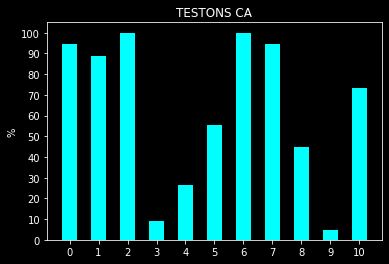

In [26]:
def beauxDessins(nbFound, nbTheori, title='% Seat found by plane'):
    tauxReu = []
    planes_names = []
    for plane in nbFound:
        tauxReu.append(nbFound[plane]/nbTheori[plane]*100)
        planes_names.append(plane)
    print(tauxReu)

    ind = np.arange(len(tauxReu))
    width = 0.5
    color = []
    for i in tauxReu:
        color.append([(1-i/100), i/100, 0])

    color=[0,1,1]
    beauDessin = plt.bar(ind, tauxReu, width, color=color)
    plt.ylabel('%')
    plt.title(title)
    plt.xticks(ind, ind)
    plt.yticks(np.arange(0, 101, 10))

    plt.show()

beauxDessins(nbSeatFound, nbSeatTheori, title = 'TESTONS CA')

##### Compteur d'élément

{'Aer_Lingus_Airbus_A330-300_A_plane6.jpg': 24}
[58.333333333333336, 8.333333333333332, 95.65217391304348, 42.857142857142854, 36.0, 85.71428571428571]


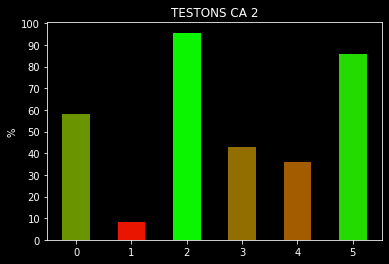

In [24]:
nbEleFound = {}
for plane in jsonEle.keys():
    nbEleFound[plane] = 0
    for el in jsonEle[plane]:
        nbEleFound[plane] += len(jsonEle[plane][el])
print(nbEleFound)
nbEleFound = {'united_airlines_boeing_777-200_6_plane974.svg': 14, 'united_airlines_boeing_777-200_9_plane975.svg': 2, 'united_airlines_boeing_777-200_v5_plane976.svg': 22, 'united_airlines_boeing_777-300er_plane977.svg': 12, 'united_airlines_boeing_787-800_plane979.svg': 9, 'united_airlines_boeing_787-900_plane980.svg': 30}

df_element = pd.read_csv('Images.csv', sep=';')
# print(df_element)
nbEleTheori = {}
for row, data in df_element.iterrows():
    nbEleTheori[data['name']] = data['sum']

beauxDessins(nbEleFound, nbEleTheori, title='TESTONS CA 2')
